In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv', index_col=False)
df_test = pd.read_csv('test.csv', index_col=False)

In [3]:
np.random.seed(42)

filtered_data = df_train[(df_train['age'] >= 0) & (df_train['age'] <= 10)]

shuffled_data = filtered_data.sample(frac=1)

num_rows_to_remove = int(len(shuffled_data) / 2.2)

filtered = pd.DataFrame(shuffled_data.iloc[num_rows_to_remove:])
other_data = df_train[(df_train['age'] > 10)]
df_train = pd.concat([filtered, other_data])

array([[<Axes: title={'center': 'model_date'}>,
        <Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'production_date'}>],
       [<Axes: title={'center': 'engine_power'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'owners'}>],
       [<Axes: title={'center': 'restyling'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

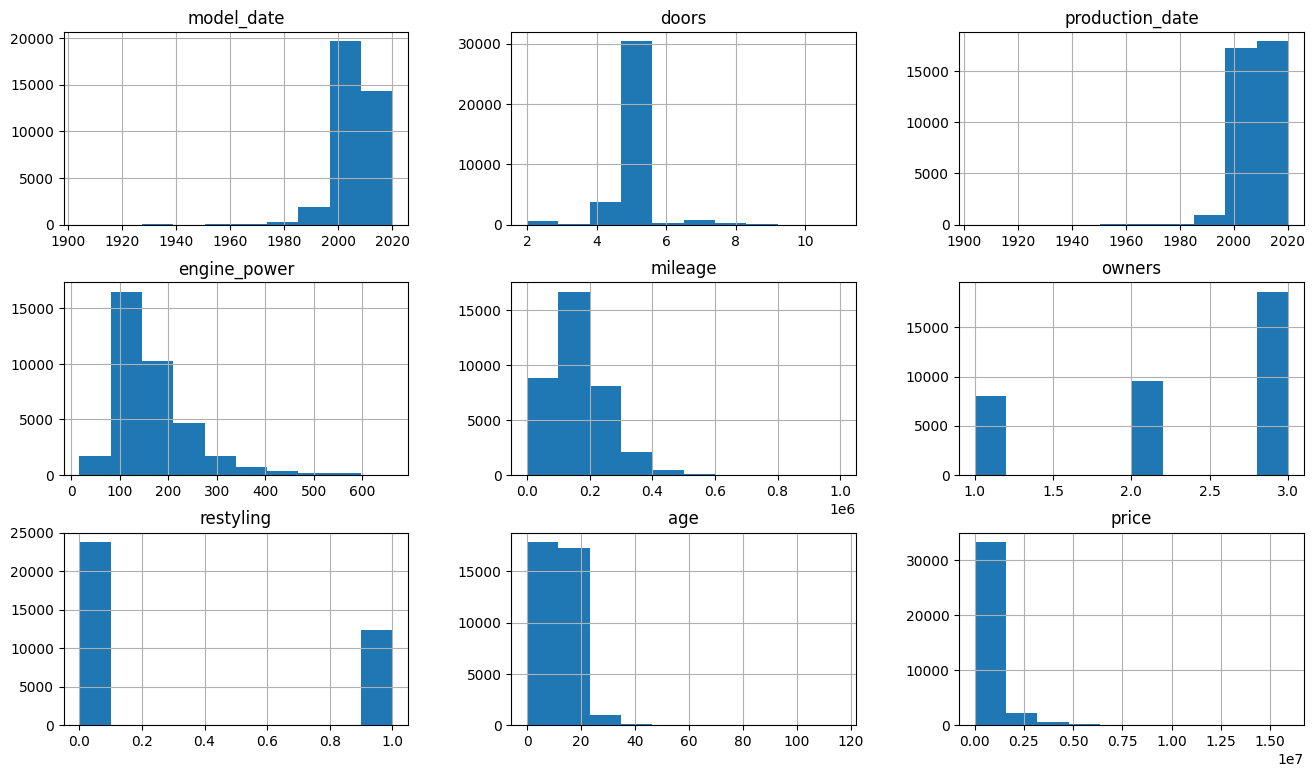

In [4]:
df_train.hist(figsize=(16,9))

array([[<Axes: title={'center': 'model_date'}>,
        <Axes: title={'center': 'doors'}>,
        <Axes: title={'center': 'production_date'}>],
       [<Axes: title={'center': 'engine_power'}>,
        <Axes: title={'center': 'mileage'}>,
        <Axes: title={'center': 'owners'}>],
       [<Axes: title={'center': 'restyling'}>,
        <Axes: title={'center': 'age'}>, <Axes: title={'center': 'id'}>]],
      dtype=object)

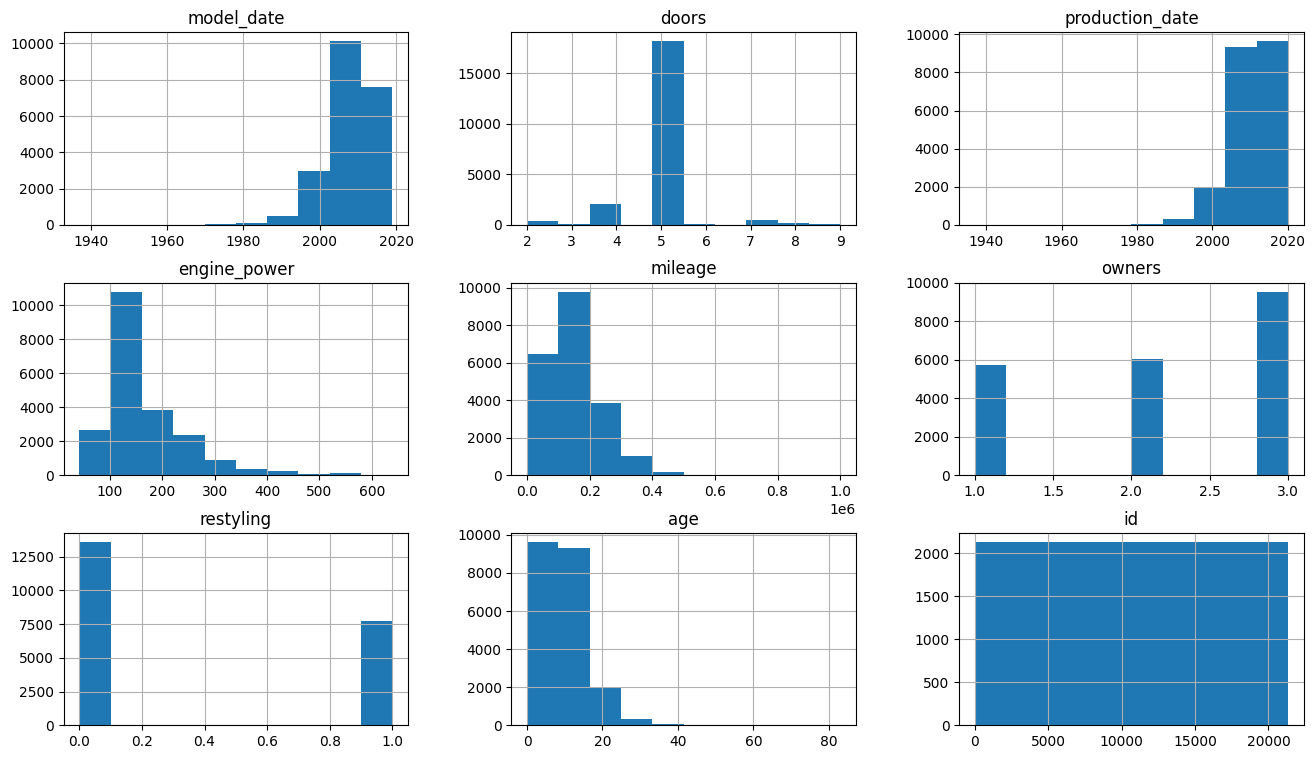

In [5]:
df_test.hist(figsize=(16,9))

In [6]:
for df in (df_train, df_test):
    df.drop(['from', 'style', 'color', 'description'], axis=1, inplace=True)

    df['engine_displacement'] = df['engine_displacement'].apply(lambda x: x if x != 'Electro' else 0)
    df['condition'] = df['condition'].apply(lambda x: 1 if x != 'Битый' else 0)
    df['generation'] = df['generation'].apply(lambda x: x if x != 'Unknown' else 0)
    df['features'] = df['features'].apply(lambda x: list(map(lambda x: x.strip().strip("'"), x[1:-1].split(','))) if (len(x.split(",")) != 1) & (x != 'Unknown')  else [])
    df['features_count'] = df['features'].apply(lambda x: len(x))
    df['wheel'] = df['wheel'].apply(lambda x: 1 if x == 'Левый' else 0)

In [7]:
df_train

,body,fuel,model_date,doors,production_date,transmission,engine_displacement,engine_power,mileage,drive_type,wheel,condition,owners,generation,restyling,age,features,price,brand,features_count
20996,седан,бензин,2007,5,2010,механическая,1.8,125,26500,передний,1,1,2,2,1.0,10.0,"[Антипробуксовочная система (ASR), Система ста...",650000,ford,51
34461,хэтчбек,бензин,2010,5,2010,автоматическая,1.6,126,88500,передний,1,1,1,1,1.0,10.0,"[Антипробуксовочная система (ASR), Крепление д...",469000,hyundai,18
17842,седан,дизель,2016,4,2017,автоматическая,2.0,190,84500,полный,1,1,1,7,0.0,3.0,"[лектроусилитель, Климат многозонный, Управлен...",2080000,bmw,45
1276,седан,бензин,2010,5,2015,автоматическая,1.6,105,141500,передний,1,1,2,6,0.0,5.0,[],570000,volkswagen,0
5162,лифтбек,бензин,2013,5,2016,роботизированная,1.4,150,38500,передний,1,1,1,3,0.0,4.0,"[Круиз-контроль, Мультифункциональное рулевое ...",1049000,skoda,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,хэтчбек,бензин,2007,5,2008,автоматическая,1.6,115,150094,задний,1,1,3,1,1.0,12.0,"[идроусилитель, Климат многозонный, Ткань, Пер...",382274,bmw,20
49751,седан,бензин,2006,5,2008,механическая,1.6,105,187500,передний,1,1,2,1,1.0,12.0,[],335000,mazda,0
49754,внедорожник,дизель,2006,5,2008,автоматическая,3.0,235,320000,полный,1,1,2,2,0.0,12.0,"[Защита картера, Фаркоп, Антипробуксовочная си...",900000,bmw,36
49755,седан,бензин,1999,5,2000,механическая,2.0,140,350,передний,1,1,3,5,0.0,20.0,[],160000,nissan,0


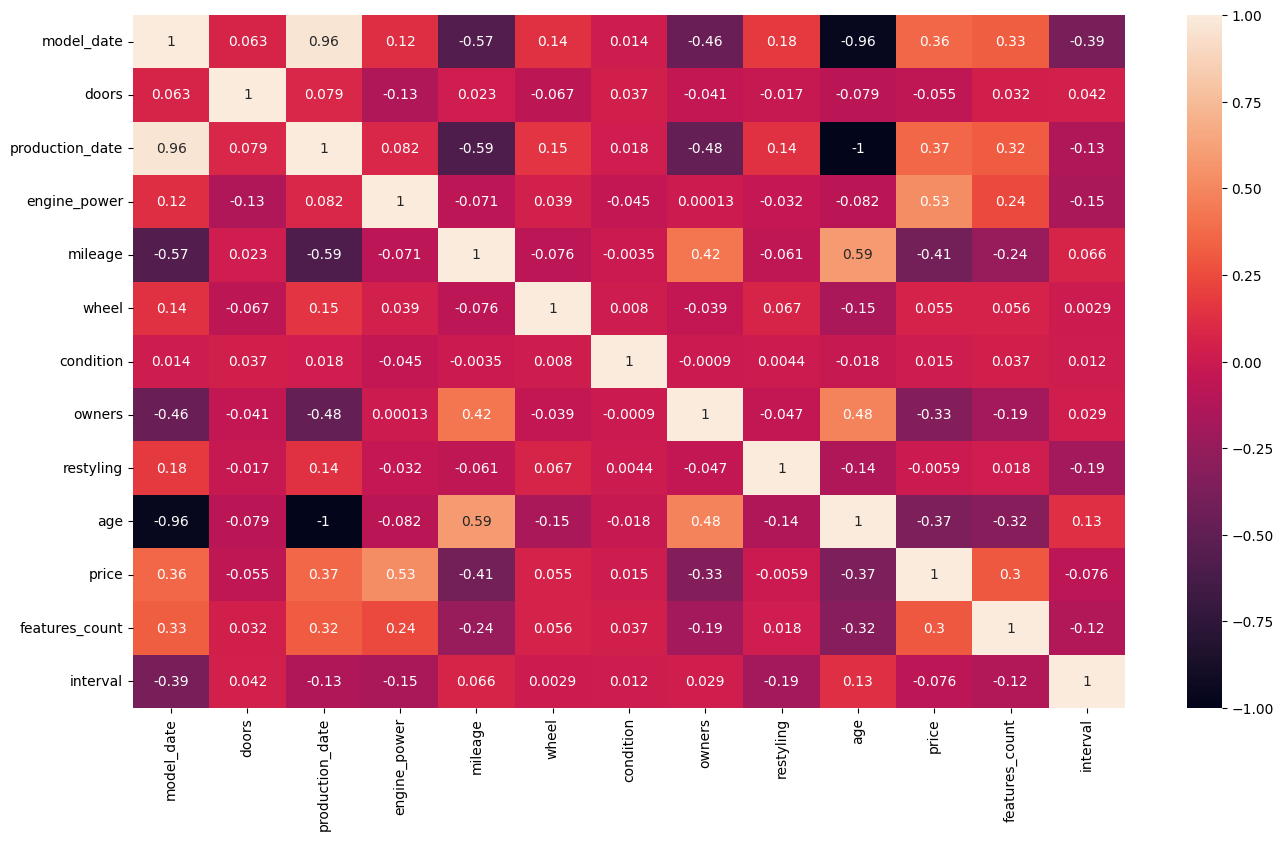

In [8]:
plt.figure(figsize=(16, 9))

data = df_train.select_dtypes(include=['float64', 'int64', 'bool'])
data['interval'] = df_train['production_date'] - df_train['model_date']
sns.heatmap(data.corr(), annot=True)
plt.show()

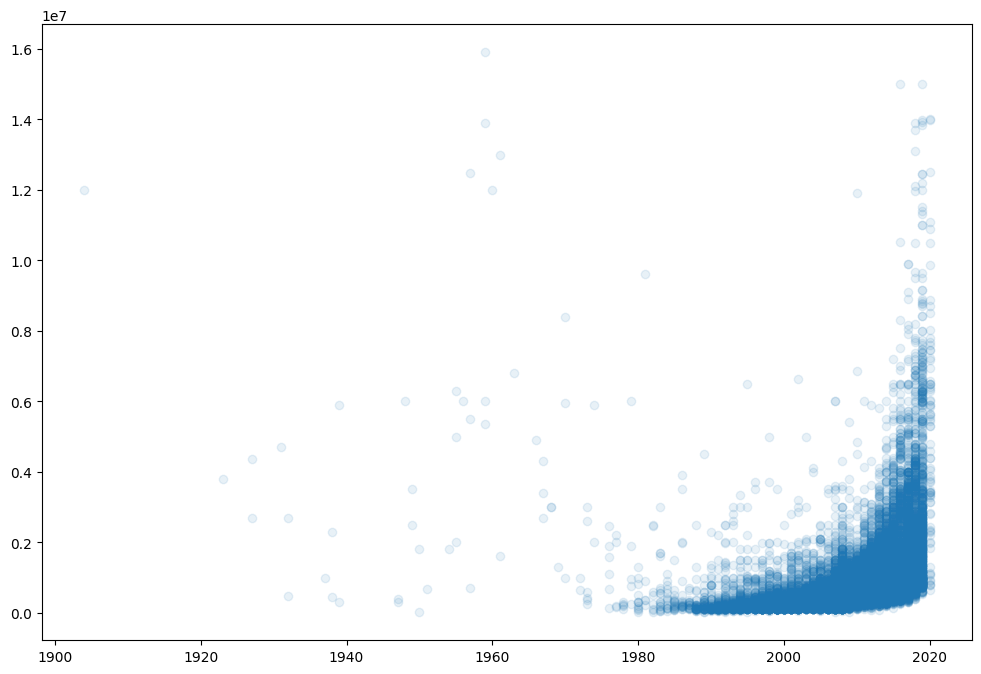

In [9]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['production_date'], df_train['price'], 'o', alpha=0.1)

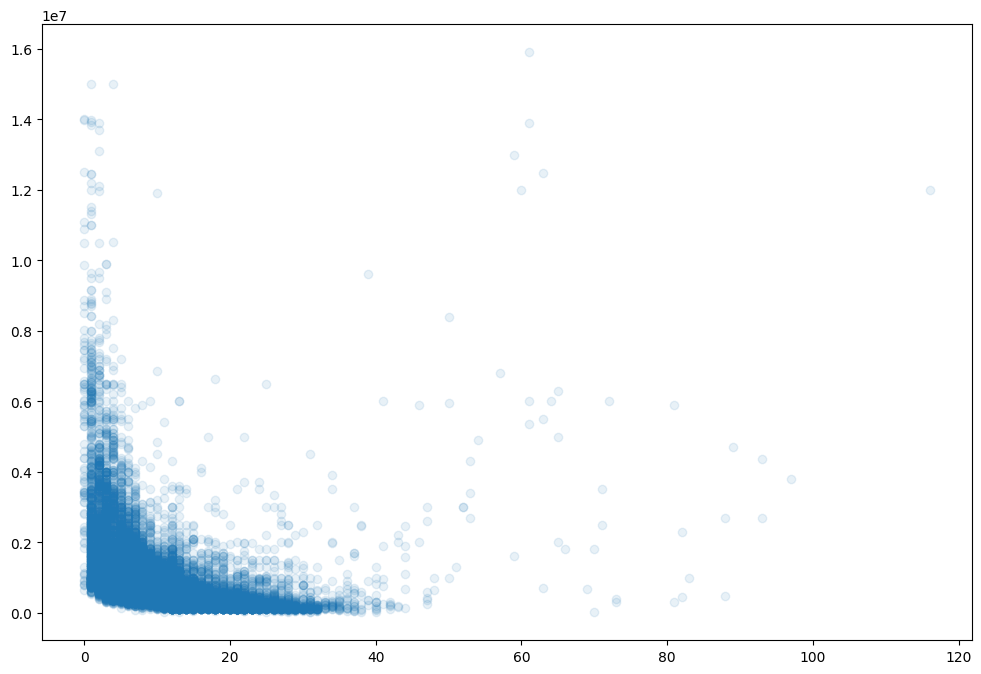

In [10]:
plt.figure(figsize=(12, 8))
plt.plot(df_train['age'], df_train['price'], 'o', alpha=0.1)

In [11]:
df_train.drop(['production_date'], axis=1, inplace=True) 
df_test.drop(['production_date'], axis=1, inplace=True) 


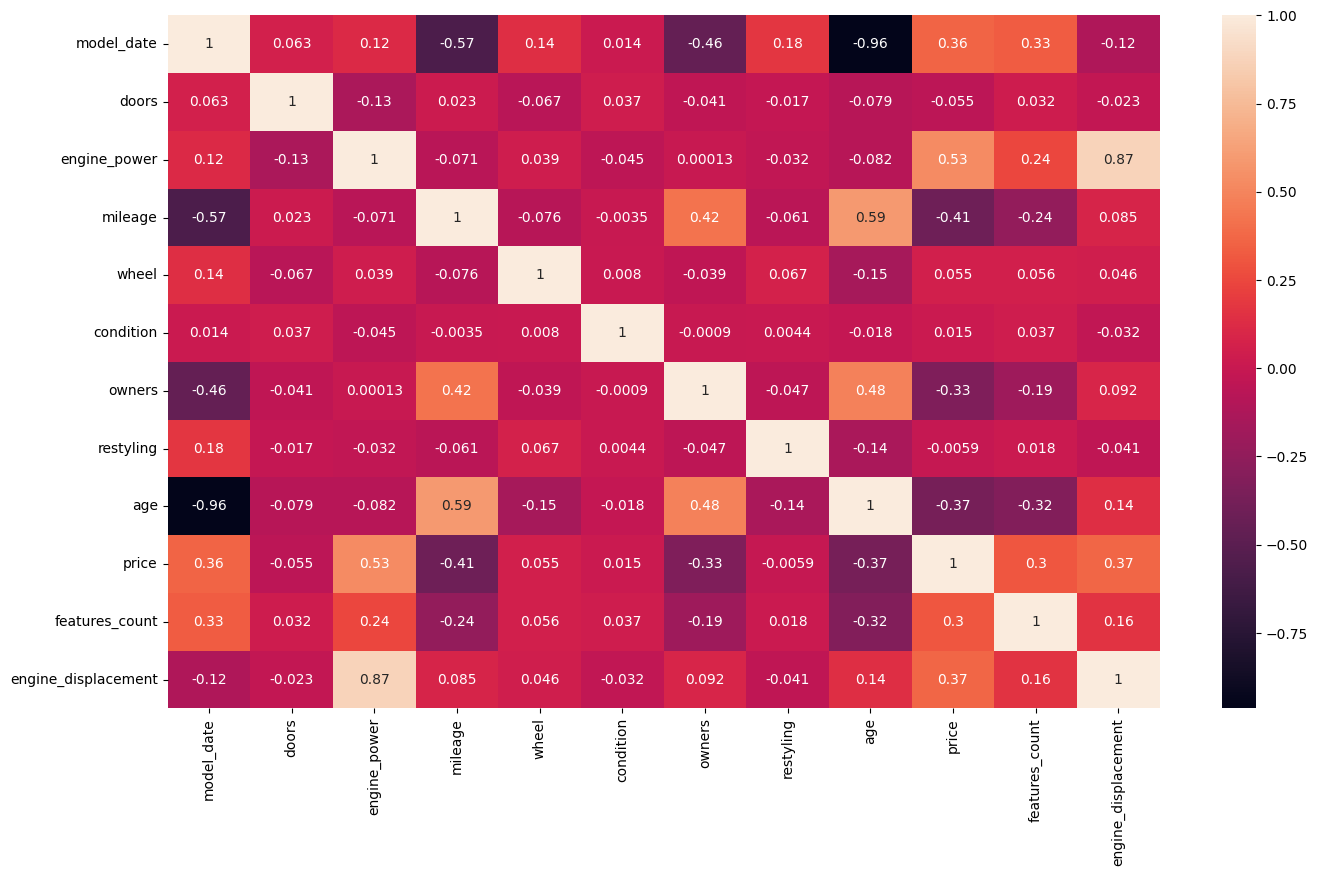

In [12]:
plt.figure(figsize=(16, 9))

data = df_train.select_dtypes(include=['float64', 'int64', 'bool'])
data['engine_displacement'] = df_train['engine_displacement']
sns.heatmap(data.corr(), annot=True)
plt.show()

In [13]:
train_features = [i for i in (j for j in df_train['features'].to_list())][0]
test_features = [i for i in (j for j in df_test['features'].to_list())][0]

features = list(set(train_features) & set(test_features))
for i in range(len(features)):
    feature = features[i]
    df_train[f'feature_{i}'] = df_train['features'].apply(lambda x: 1 if feature in x else 0)
    df_test[f'feature_{i}'] = df_test['features'].apply(lambda x: 1 if feature in x else 0)
    
df_train.drop(['features'], axis=1, inplace=True)
df_test.drop(['features'], axis=1, inplace=True)

In [14]:
from sklearn.preprocessing import LabelEncoder
for df in (df_train, df_test):
    for column in ['body', 'fuel', 'transmission', 'drive_type', 'brand']:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
    df.drop(['body', 'fuel', 'transmission', 'drive_type', 'brand'], axis=1, inplace=True)

In [15]:
plt.figure(figsize=(52, 42))

sns.heatmap(df_train.corr(), annot=True)
plt.show()

In [ ]:
df_train

,model_date,doors,engine_displacement,engine_power,mileage,wheel,condition,owners,generation,restyling,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
20996,2007,5,1.8,125,26500,1,1,2,2,1.0,...,1,1,1,1,1,1,1,1,1,1
34461,2010,5,1.6,126,88500,1,1,1,1,1.0,...,0,0,0,1,0,0,1,1,0,1
17842,2016,4,2.0,190,84500,1,1,1,7,0.0,...,0,0,0,0,0,0,0,0,1,0
1276,2010,5,1.6,105,141500,1,1,2,6,0.0,...,0,0,0,0,0,0,0,0,0,0
5162,2013,5,1.4,150,38500,1,1,1,3,0.0,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49747,2007,5,1.6,115,150094,1,1,3,1,1.0,...,0,0,0,0,0,0,0,0,0,0
49751,2006,5,1.6,105,187500,1,1,2,1,1.0,...,0,0,0,0,0,0,0,0,0,0
49754,2006,5,3.0,235,320000,1,1,2,2,0.0,...,0,1,1,0,1,1,1,1,1,0
49755,1999,5,2.0,140,350,1,1,3,5,0.0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_train.to_csv('train_without_stand.csv', index=False)
df_test.to_csv('test_without_stand.csv', index=False)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

price = df_train['price']
id = df_test['id']

df_train.drop(['price'], axis=1, inplace=True)
df_test.drop(['id'], axis=1, inplace=True)

df_standardized_train = pd.DataFrame(scaler.fit_transform(df_train), columns=df_train.columns)
df_standardized_test = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)


In [ ]:
pd.concat([df_standardized_train, price], axis=1).to_csv('train_preprocessed_1.csv', index=False)
pd.concat([df_standardized_test, id], axis=1).to_csv('test_preprocessed_1.csv', index=False)